In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
sample_data_path = "data"

In [2]:
# model
model_base = VGG16(weights='imagenet', include_top=False)
flatten_layer = layers.Flatten()

model = models.Sequential([
    model_base,
    flatten_layer,])

model.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [3]:
# create new dataset
onlyfiles = [f for f in os.listdir(sample_data_path) if os.path.isfile(os.path.join(sample_data_path, f))]

feature_dataset = []

for file in onlyfiles:
    img_path = os.path.join(sample_data_path,file)
    img = image.load_img(img_path, target_size=(80, 60))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    out = np.squeeze(features, axis=0)
    feature_dataset.append(out)
feature_dataset = np.array(feature_dataset)

In [4]:
# create small dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(feature_dataset)
feature_dataset_small = pca.transform(feature_dataset)


In [5]:
# build KD tree
from sklearn.neighbors import KDTree
tree = KDTree(feature_dataset_small)

In [6]:
def show_img(img_paths):
    fig = plt.figure(figsize=(3*len(img_paths), 3))
    columns = len(img_paths)
    rows = 1
    for i in range(0, columns*rows):
        img = cv2.imread(img_paths[i])[:,:,::-1]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
    plt.show()

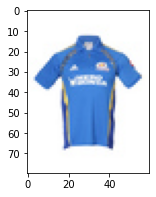

In [7]:
# test img
test_img = "3313.jpg"
test_img_path = os.path.join(sample_data_path,test_img)

show_img([test_img_path])

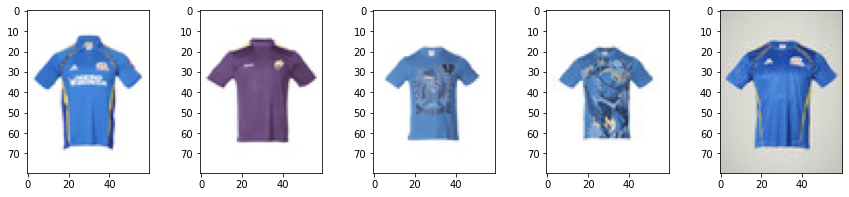

In [15]:
img = image.load_img(test_img_path, target_size=(80, 60))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)

features_small = pca.transform(features)
dist , ind = tree.query(features_small, k=5)

img_paths = [os.path.join(sample_data_path,onlyfiles[i]) for i in ind[0]]
show_img(img_paths)